<a href="https://colab.research.google.com/github/JuanGans/PCVK_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

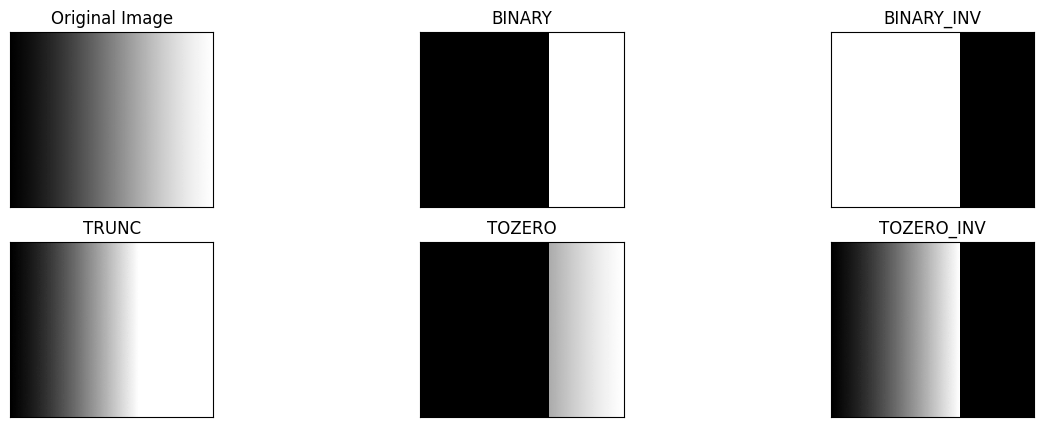

In [ ]:
def global_thresholding(image_path, threshold_value):
    # Load the image
    img = cv2.imread(image_path, 0)  # Load as grayscale image

    # 1. Binary threshold
    ret, thresh1 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY) # Changed cv to cv2

    # 2. Binary threshold inverse
    ret, thresh2 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV) # Changed cv to cv2

    # 3. Threshold Truncate
    ret, thresh3 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TRUNC) # Changed cv to cv2

    # 4. Threshold Tozero
    ret, thresh4 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO) # Changed cv to cv2

    # 5. Threshold Tozero Inverse
    ret, thresh5 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO_INV) # Changed cv to cv2

    # Define titles and images for display
    titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

    # Plot images
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], 'gray', interpolation='nearest')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()

# Example of how to call the method
image_path = '/content/drive/MyDrive/PCVK/gradient.jpg'
threshold_value = 170
global_thresholding(image_path, threshold_value)

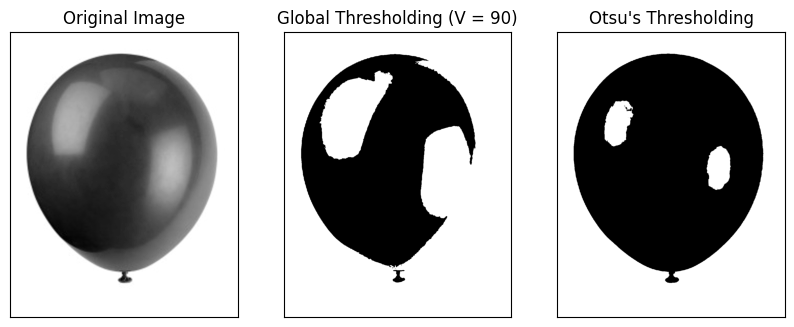

Optimal threshold calculated by Otsu's method: 163


In [ ]:

def global_thresholding(img, thresh_value):
    _, global_thresh = cv2.threshold(img, thresh_value, 255, cv2.THRESH_BINARY)
    return global_thresh

# Load the image
filename = '/content/drive/MyDrive/PCVK/balloon.jpg'

# Check if the file exists
import os
if not os.path.exists(filename):
    raise FileNotFoundError(f"Error: Image file not found at path: {filename}")

img = cv2.imread(filename, 0)  # Load as grayscale image

# Check if the image was loaded successfully
if img is None:
    raise IOError(f"Error: Could not read image file: {filename}")

# Calculate histogram
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Normalize the histogram
hist = hist.astype(float) / hist.sum()

# Compute cumulative sum and cumulative mean
cumulative_sum = np.cumsum(hist)
cumulative_mean = np.cumsum(hist * np.arange(256))

# Global mean (mean of the entire image)
global_mean = cumulative_mean[-1]

# Compute the between-class variance for each threshold
between_class_variance = ((global_mean * cumulative_sum - cumulative_mean) ** 2) / (cumulative_sum * (1 - cumulative_sum))

# Handle division by zero (replace invalid values with zero)
between_class_variance = np.nan_to_num(between_class_variance)

# Find the threshold that maximizes the between-class variance
optimal_threshold = np.argmax(between_class_variance)

# Apply global thresholding (using a manually chosen threshold value for demonstration)
global_thresh_value = 90
global_result = global_thresholding(img, global_thresh_value)

# Apply Otsu's thresholding using the optimal threshold
_, otsu_result = cv2.threshold(img, optimal_threshold, 255, cv2.THRESH_BINARY)

# Display the original image, global thresholding, and Otsu's thresholding
titles = ['Original Image', 'Global Thresholding (V = 90)', "Otsu's Thresholding"]
images = [img, global_result, otsu_result]

plt.figure(figsize=(10, 5))
for i in range(3):  # Loop for 3 images
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# Display the optimal threshold value calculated by Otsu's method
print(f"Optimal threshold calculated by Otsu's method: {optimal_threshold}")

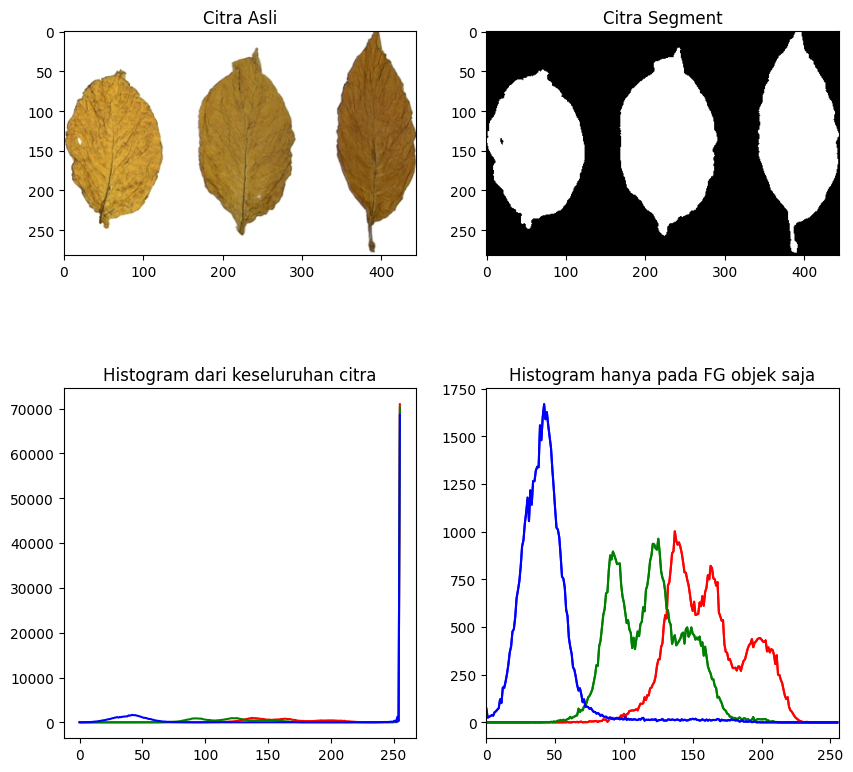

In [ ]:
filename_3 = ('/content/drive/MyDrive/PCVK/tobacco.jpg')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

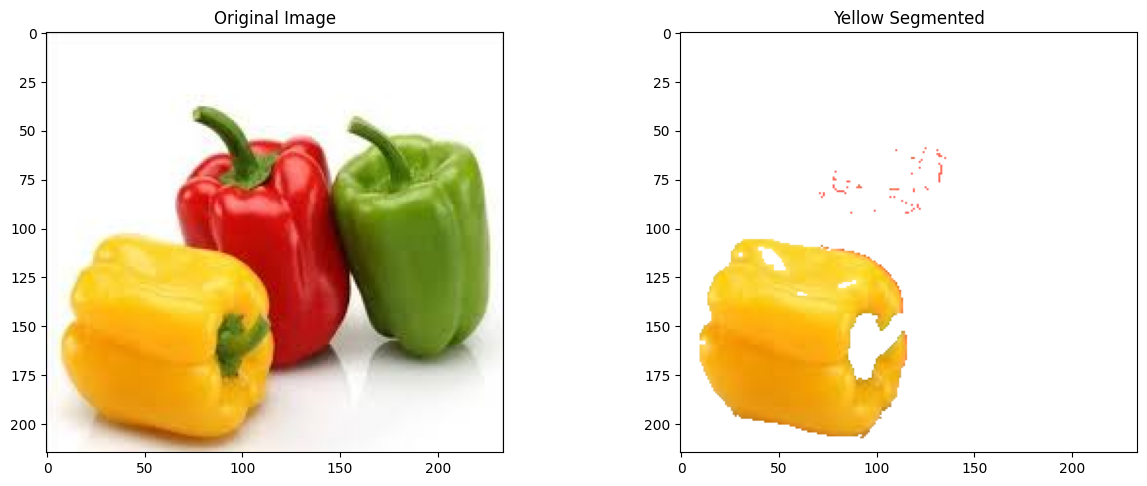

In [ ]:

filename_4 = '/content/drive/MyDrive/PCVK/peppers.jpg'
img_p = cv2.imread(filename_4)

img_rgb2 = cv2.cvtColor(img_p, cv2.COLOR_BGR2RGB)


pixel_values = img_rgb2.reshape((-1, 3))
pixel_values = np.float32(pixel_values)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)


labels = labels.flatten()


masked_image = np.copy(img_rgb2)



masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img_rgb2), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(masked_image0), plt.title('Yellow Segmented')
plt.show()


In [ ]:
img_c = cv2.imread('/content/drive/MyDrive/PCVK/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


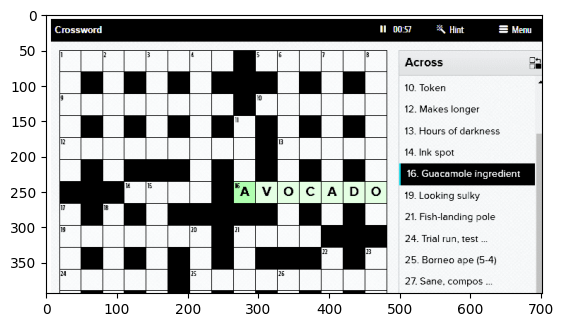

In [ ]:
filename_4 = '/content/drive/MyDrive/PCVK/crossword.jpg'
img_c = cv2.imread(filename_4)

# Periksa apakah gambar berhasil dibaca
if img_c is None:
    print(f"Error: Gambar tidak dapat dibaca dari {filename_4}. Pastikan path file benar dan gambar tidak rusak.")
else:
    # Lanjutkan dengan konversi warna jika gambar berhasil dibaca
    img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

    ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

    plt.imshow(thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()